<a href="https://colab.research.google.com/github/alexapruiz/Projetos/blob/master/Aula_018_Redu%C3%A7%C3%A3o_de_Dimensionalidade_(Parte_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 018 - Redução de Dimensionalidade (Parte 1)

Redução de dimensionalidade é o processo no qual nós minimizamos a quantidade de dados, descartando *features* desnecessárias, porém preservando o máximo de informação possível.

**Exemplo com apenas 1 variável alvo e 1 variável independente**

In [ ]:
# importar as bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

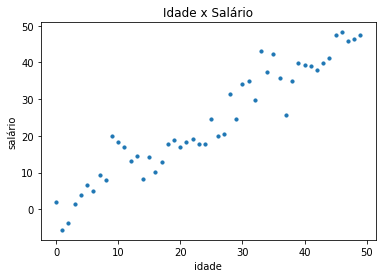

In [ ]:
# exemplo com apenas 1 variável independente
x = np.arange(50)
y = np.random.normal(x, 5)

plt.scatter(x, y, s=10)
plt.title("Idade x Salário")
plt.xlabel("idade")
plt.ylabel("salário")
plt.show()

**E se eu tiver 100 variáveis independentes?**

* Complexidade computacional
* Visualização inviável
* Provavelmente há variáveis desnecessárias
* Modelo muito complexo

## Técnicas de redução de dimensionalidade

1. Feature Selection (Parte 1)
    * Proporção de valores ausentes
    * Baixa variância
    * Alta correlação
    * Backward feature elimination
    * Forward feature selection
2. Features extraction (Parte 2)
    * Factor Analysis
    * Principal Component Analysis

### Proporção de valores ausentes

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv")

df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False).head(10)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
dtype: float64

In [ ]:
df_clean = df.drop(['roubo_bicicleta', 'roubo_bicicleta'], axis=1)

In [ ]:
threshold = 0.6

colunas = df.columns
val_ausentes = (df.isnull().sum() / df.shape[0])
manter = []

for i, j in enumerate(colunas):
    if val_ausentes[i] < threshold:
        manter.append(j)

In [ ]:
df_clean = df[manter].copy()

Algumas literaturas trazem como guideline, um *threshold* entre 60-75%.

No entanto, conheça o seu problema. Os dados ausentes podem ser devido ao fato de não lançamento, erro na coleta de dados ou mesmo erro na leitura (separador, encoding). Nesse caso, você pode apenas tratar os dados, preencher com média, mediana, moda ou criar um modelo de machine learning.

### Filtro de baixa variância


In [ ]:
from sklearn.preprocessing import normalize

df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/escola-data-science/master/datasets/baixa_variancia.csv")

df.head()w

,ID,temp,atemp,humidity,windspeed,count
0,AB101,9.84,14.395,81,0.0,16
1,AB102,9.02,13.635,80,0.0,40
2,AB103,9.02,13.635,80,0.0,32
3,AB104,9.84,14.395,75,0.0,13
4,AB105,9.84,14.395,75,0.0,1


In [ ]:
df['nova'] = np.random.normal(7, .2, df.shape[0])
df.head()

,ID,temp,atemp,humidity,windspeed,count,nova
0,AB101,9.84,14.395,81,0.0,16,6.966514
1,AB102,9.02,13.635,80,0.0,40,6.884095
2,AB103,9.02,13.635,80,0.0,32,7.201195
3,AB104,9.84,14.395,75,0.0,13,6.823344
4,AB105,9.84,14.395,75,0.0,1,7.021069


In [ ]:
df.drop('ID', axis=1, inplace=True)

In [ ]:
df.var()

temp            61.291712
atemp           73.137484
humidity       398.549141
windspeed       69.322053
count        25843.419864
nova             0.040718
dtype: float64

In [ ]:
scaler = normalize(df)
scaler

array([[0.11621132, 0.17000629, 0.95661755, 0.        , 0.18896149,
        0.08227518],
       [0.09892002, 0.14953153, 0.87733938, 0.        , 0.43866969,
        0.0754961 ],
       [0.10250575, 0.15495188, 0.90914193, 0.        , 0.36365677,
        0.08183635],
       ...,
       [0.18334855, 0.22722241, 0.34357403, 0.07088532, 0.88892963,
        0.03859465],
       [0.34761867, 0.43080107, 0.65139728, 0.13439463, 0.49630269,
        0.06982121],
       [0.21890332, 0.24017632, 0.74246935, 0.09177755, 0.57562231,
        0.0580669 ]])

In [ ]:
variancia = pd.DataFrame(scaler).var()
variancia

0    0.005814
1    0.007888
2    0.092631
3    0.008643
4    0.112018
5    0.000978
dtype: float64

In [ ]:
threshold = 0.05

colunas = df.columns
manter = []

for i, j in enumerate(colunas):
    if variancia[i] >= threshold:
        manter.append(j)

In [ ]:
manter

['humidity', 'count']

In [ ]:
df_novo = df[manter]

Você deve devinir um threshold e também normalizar os dados antes de trabalhar com o filtro de baixa variância.

## Filtro de alta correlação

In [ ]:
df.drop('count', axis=1).corr()

,temp,atemp,humidity,windspeed,nova
temp,1.000000,0.991839,-0.048478,-0.008669,0.020124
atemp,0.991839,1.000000,-0.031606,-0.049997,0.017824
humidity,-0.048478,-0.031606,1.000000,-0.296975,-0.001451
windspeed,-0.008669,-0.049997,-0.296975,1.000000,0.008898
nova,0.020124,0.017824,-0.001451,0.008898,1.000000


In [ ]:
corr = df.drop('count', axis=1).corr()

In [ ]:
m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.5).any()

m

temp         False
atemp        False
humidity      True
windspeed     True
nova          True
dtype: bool